## **参考 Notebook**
点推定からuncertainty推定の変換を紹介しているNote

In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

import scipy.stats  as stats
import os

In [2]:
pd.options.display.max_columns = 50

In [6]:
best = pd.read_csv(os.path.join("rawdata","kkiller_first_public_notebook_under050_v5.csv"))
best

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,0.897124,0.854312,0.832541,0.815879,1.081062,1.164046,1.105037,0.974012,0.974436,0.983799,0.919591,1.110002,1.352878,1.154132,0.994399,0.940056,0.953306,0.943153,1.097553,1.357092,1.268017,0.953171,0.847881,0.821939,0.836528,1.024761,1.227702,1.216257
1,FOODS_1_001_CA_2_validation,1.007065,0.994443,0.882494,1.080634,1.168366,1.315950,1.483078,0.892823,0.952415,0.938610,0.851674,1.102895,1.425480,1.208673,0.948578,0.909722,0.934895,0.929591,1.133824,1.461612,1.369523,0.980920,0.924507,0.940111,0.939824,1.165143,1.505246,1.340809
2,FOODS_1_001_CA_3_validation,1.073374,1.033853,0.909499,0.896288,0.993775,1.265653,1.289709,1.086458,1.154607,1.022421,1.055315,1.135434,1.521511,1.335581,1.161435,1.155311,1.043500,1.039642,1.131511,1.767146,1.725098,1.153049,1.083523,0.963347,0.959298,1.039617,1.395567,1.381182
3,FOODS_1_001_CA_4_validation,0.402322,0.357962,0.340659,0.350617,0.423320,0.421849,0.463273,0.392785,0.415164,0.405559,0.367399,0.431221,0.439027,0.386763,0.378033,0.383403,0.417453,0.419169,0.467688,0.477636,0.517372,0.381851,0.354123,0.360671,0.367368,0.422372,0.437493,0.453251
4,FOODS_1_001_TX_1_validation,0.204992,0.202433,0.192775,0.195766,0.193999,0.187458,0.214553,0.511788,0.505921,0.468297,0.488826,0.511372,0.507336,0.415814,0.409143,0.443592,0.374869,0.410791,0.413774,0.391719,0.400184,0.304412,0.283287,0.271829,0.270916,0.284126,0.322768,0.342889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.265897,0.241860,0.262522,0.262410,0.335046,0.428304,0.336325,0.229526,0.212937,0.218021,0.272943,0.341066,0.351346,0.327052,0.230011,0.215596,0.217491,0.227702,0.274165,0.347776,0.334183,0.244076,0.216657,0.224447,0.225337,0.281951,0.352499,0.336352
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.180863,0.163251,0.181697,0.166970,0.196206,0.234894,0.171843,0.134945,0.121142,0.118850,0.130750,0.150172,0.186511,0.158402,0.132024,0.127118,0.125148,0.127821,0.161337,0.188679,0.174944,0.144585,0.135786,0.138674,0.142226,0.179530,0.208989,0.190811
60977,HOUSEHOLD_2_516_WI_1_evaluation,0.090440,0.080708,0.080191,0.089078,0.099828,0.123825,0.108734,0.091631,0.090598,0.086073,0.098199,0.125181,0.142952,0.119514,0.091765,0.085555,0.086227,0.090374,0.121277,0.136808,0.133362,0.090753,0.087026,0.086818,0.091138,0.131207,0.146232,0.140431
60978,HOUSEHOLD_2_516_WI_2_evaluation,0.039396,0.035953,0.035114,0.088505,0.098285,0.093726,0.100442,0.092332,0.089269,0.081750,0.110968,0.124439,0.118276,0.101014,0.093748,0.086318,0.090481,0.094933,0.122324,0.120830,0.112905,0.092044,0.086954,0.091442,0.081617,0.103097,0.105625,0.099684


In [7]:
sales = pd.read_csv(os.path.join("rawdata","sales_train_validation.csv"))
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,...,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,...,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


In [8]:
sub = best.merge(sales[["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"]], on = "id")
sub["_all_"] = "Total"
sub.shape

(30490, 35)

In [12]:
sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,item_id,dept_id,cat_id,store_id,state_id,_all_
0,FOODS_1_001_CA_1_validation,0.897124,0.854312,0.832541,0.815879,1.081062,1.164046,1.105037,0.974012,0.974436,0.983799,0.919591,1.110002,1.352878,1.154132,0.994399,0.940056,0.953306,0.943153,1.097553,1.357092,1.268017,0.953171,0.847881,0.821939,0.836528,1.024761,1.227702,1.216257,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,Total
1,FOODS_1_001_CA_2_validation,1.007065,0.994443,0.882494,1.080634,1.168366,1.315950,1.483078,0.892823,0.952415,0.938610,0.851674,1.102895,1.425480,1.208673,0.948578,0.909722,0.934895,0.929591,1.133824,1.461612,1.369523,0.980920,0.924507,0.940111,0.939824,1.165143,1.505246,1.340809,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,Total
2,FOODS_1_001_CA_3_validation,1.073374,1.033853,0.909499,0.896288,0.993775,1.265653,1.289709,1.086458,1.154607,1.022421,1.055315,1.135434,1.521511,1.335581,1.161435,1.155311,1.043500,1.039642,1.131511,1.767146,1.725098,1.153049,1.083523,0.963347,0.959298,1.039617,1.395567,1.381182,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,Total
3,FOODS_1_001_CA_4_validation,0.402322,0.357962,0.340659,0.350617,0.423320,0.421849,0.463273,0.392785,0.415164,0.405559,0.367399,0.431221,0.439027,0.386763,0.378033,0.383403,0.417453,0.419169,0.467688,0.477636,0.517372,0.381851,0.354123,0.360671,0.367368,0.422372,0.437493,0.453251,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,Total
4,FOODS_1_001_TX_1_validation,0.204992,0.202433,0.192775,0.195766,0.193999,0.187458,0.214553,0.511788,0.505921,0.468297,0.488826,0.511372,0.507336,0.415814,0.409143,0.443592,0.374869,0.410791,0.413774,0.391719,0.400184,0.304412,0.283287,0.271829,0.270916,0.284126,0.322768,0.342889,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,Total


In [13]:
qs = np.array([0.005,0.025,0.165,0.25, 0.5, 0.75, 0.835, 0.975, 0.995])
qs.shape

(9,)

In [14]:
qs2 = np.log(qs/(1-qs))*.065

ratios = stats.norm.cdf(qs2)
ratios /= ratios[4]
ratios = pd.Series(ratios, index=qs)
ratios.round(3)

0.005    0.731
0.025    0.812
0.165    0.916
0.250    0.943
0.500    1.000
0.750    1.057
0.835    1.084
0.975    1.188
0.995    1.269
dtype: float64

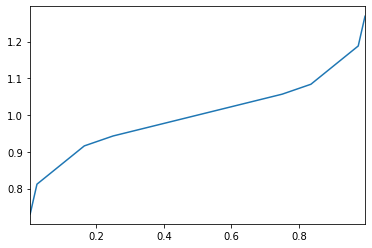

In [16]:
ratios.plot()

In [9]:
def quantile_coefs(q):
    return ratios.loc[q].values

In [10]:
def get_group_preds(pred, level):
    df = pred.groupby(level)[cols].sum()
    q = np.repeat(qs, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q)[:, None]
    if level != "id":
        df["id"] = [f"{lev}_X_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    else:
        df["id"] = [f"{lev.replace('_validation', '')}_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    df = df[["id"]+list(cols)]
    return df

In [11]:
def get_couple_group_preds(pred, level1, level2):
    df = pred.groupby([level1, level2])[cols].sum()
    q = np.repeat(qs, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q)[:, None]
    df["id"] = [f"{lev1}_{lev2}_{q:.3f}_validation" for lev1,lev2, q in 
                zip(df[level1].values,df[level2].values, q)]
    df = df[["id"]+list(cols)]
    return df

In [12]:
levels = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id", "_all_"]
couples = [("state_id", "item_id"),  ("state_id", "dept_id"),("store_id","dept_id"),
                            ("state_id", "cat_id"),("store_id","cat_id")]
cols = [f"F{i}" for i in range(1, 29)]

In [13]:
df = []
for level in levels :
    df.append(get_group_preds(sub, level))
for level1,level2 in couples:
    df.append(get_couple_group_preds(sub, level1, level2))
df = pd.concat(df, axis=0, sort=False)

df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df] , axis=0, sort=False)
df.reset_index(drop=True, inplace=True)
df.loc[df.index >= len(df.index)//2, "id"] = df.loc[df.index >= len(df.index)//2, "id"].str.replace(
                                    "_validation$", "_evaluation")


df.shape

(771120, 29)

In [14]:
df.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_0.005_validation,0.655616,0.624329,0.608419,0.596242,0.790038,0.850682,0.807559,0.711806,0.712115,0.718958,0.672035,0.811187,0.988680,0.843437,0.726704,0.686991,0.696674,0.689254,0.802089,0.991760,0.926663,0.696575,0.619629,0.600671,0.611333,0.748892,0.897201,0.888838
1,FOODS_1_001_CA_2_0.005_validation,0.735961,0.726737,0.644925,0.789725,0.853839,0.961693,1.083830,0.652473,0.696022,0.685934,0.622401,0.805993,1.041738,0.883295,0.693218,0.664822,0.683219,0.679343,0.828596,1.068142,1.000844,0.716854,0.675627,0.687031,0.686821,0.851483,1.100030,0.979860
2,FOODS_1_001_CA_3_0.005_validation,0.784419,0.755537,0.664660,0.655005,0.726248,0.924936,0.942516,0.793981,0.843784,0.747183,0.771221,0.829772,1.111917,0.976040,0.848774,0.844298,0.762587,0.759768,0.826905,1.291426,1.260698,0.842645,0.791836,0.704012,0.701053,0.759750,1.019877,1.009365
3,FOODS_1_001_CA_4_0.005_validation,0.294016,0.261598,0.248953,0.256230,0.309361,0.308286,0.338559,0.287046,0.303401,0.296381,0.268494,0.315135,0.320840,0.282645,0.276266,0.280190,0.305074,0.306328,0.341785,0.349055,0.378094,0.279056,0.258792,0.263577,0.268472,0.308669,0.319719,0.331234
4,FOODS_1_001_TX_1_0.005_validation,0.149808,0.147938,0.140879,0.143065,0.141774,0.136994,0.156795,0.374013,0.369726,0.342230,0.357233,0.373709,0.370760,0.303876,0.299001,0.324176,0.273953,0.300205,0.302385,0.286268,0.292454,0.222464,0.207026,0.198652,0.197985,0.207639,0.235878,0.250583


In [15]:
df.to_csv("submission.csv", index = False)